#Importing Libraries

In [89]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

#Mounting Colab and Reading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip "/content/drive/MyDrive/archive (7).zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: /content/cell_imag

In [5]:
data_dir='/content/cell_images/cell_images'

#Visualization and Analysis

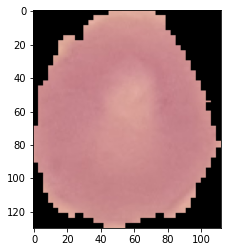

In [6]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/cell_images/cell_images/Uninfected/C99P60ThinF_IMG_20150918_141129_cell_75.png"))

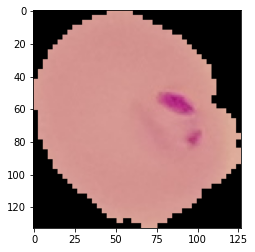

In [81]:
plt.imshow(plt.imread('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_143.png'))

In [82]:
a=plt.imread("/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_143.png")
a.shape

(133, 127, 3)

In [90]:
b=plt.imread('/content/cell_images/cell_images/Uninfected/C99P60ThinF_IMG_20150918_141129_cell_75.png')

In [91]:
b.shape

(130, 112, 3)

In [8]:
img_width=110
img_height=110
batch_size=32

#Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(rescale=1./ 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,vertical_flip=True)

data_generator = datagen.flow_from_directory(
    data_dir,target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 27558 images belonging to 2 classes.


In [11]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./ 255, rotation_range=30, zoom_range=0.2, horizontal_flip=True,validation_split=0.2)

In [12]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # my training data

Found 22048 images belonging to 2 classes.


In [13]:
validation_generator = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') #my validation data

Found 5510 images belonging to 2 classes.


In [18]:
nb_train_samples=22048
nb_test_samples=5510

#Building Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,  BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [26]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(110,110,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stopping=EarlyStopping(monitor='val_accuracy',patience=5)

#Model Training

In [31]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),
                          epochs=30,validation_data=validation_generator,
                          validation_steps=len(validation_generator),
                          callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
689/689 [==============================] - 99s 142ms/step - loss: 0.6384 - accuracy: 0.5901 - val_loss: 0.1976 - val_accuracy: 0.9330
Epoch 2/30
689/689 [==============================] - 97s 141ms/step - loss: 0.1915 - accuracy: 0.9405 - val_loss: 0.1748 - val_accuracy: 0.9367
Epoch 3/30
689/689 [==============================] - 97s 141ms/step - loss: 0.1728 - accuracy: 0.9485 - val_loss: 0.1875 - val_accuracy: 0.9423
Epoch 4/30
689/689 [==============================] - 94s 136ms/step - loss: 0.1570 - accuracy: 0.9522 - val_loss: 0.1677 - val_accuracy: 0.9446
Epoch 5/30
689/689 [==============================] - 93s 135ms/step - loss: 0.1592 - accuracy: 0.9533 - val_loss: 0.1754 - val_accuracy: 0.9436
Epoch 6/30
689/689 [==============================] - 97s 141ms/step - loss: 0.1509 - accuracy: 0.9538 - val_loss: 0.1553 - val_accuracy: 0.9434


#Testing the Prediction

In [94]:
print(train_generator.class_indices)

{'Parasitized': 0, 'Uninfected': 1}


In [100]:
def testing(a):
  img = cv2.resize(a, (110, 110))
  img1 = img.reshape(-1,110,110,3)
  result=model.predict(img1)
  if result[0][0]>0.5:
    prediction='The Cell is Uninfected'
  else:
    prediction='The Cell is Parasitized'
  print(prediction)

In [101]:
img=plt.imread("/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_143.png")
testing(img)

The Cell is Parasitized


In [102]:
img1=plt.imread("/content/cell_images/cell_images/Uninfected/C238NThinF_IMG_20151207_114345_cell_189.png")
testing(img1)

The Cell is Uninfected
